<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_6/blob/main/CS203_Lab_6_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task1: Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset
- Load the Iris dataset using sklearn.datasets.load_iris.
- Extract features and labels, ensuring labels are one-hot encoded.
- Split the dataset into training (80%) and testing (20%) sets.
- Normalize feature values to [0,1] using standard scaling.


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris(as_frame=True)

In [3]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [4]:
X=iris.data
y=iris.target

In [5]:
y=y.to_numpy().reshape(-1, 1)

In [6]:
y.shape

(150, 1)

In [7]:
encoder=OneHotEncoder(sparse_output=False)
y_encoded=encoder.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45, stratify=y)

In [11]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 2: Define and Train the MLP Model
- Construct a Multi-Layer Perceptron (MLP) model with the following architecture:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.
- Train using:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3423 - loss: 1.6523 - val_accuracy: 0.3000 - val_loss: 1.6593
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2890 - loss: 1.6833 - val_accuracy: 0.3000 - val_loss: 1.6180
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2804 - loss: 1.6180 - val_accuracy: 0.3000 - val_loss: 1.5786
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3085 - loss: 1.5405 - val_accuracy: 0.3000 - val_loss: 1.5402
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3106 - loss: 1.4812 - val_accuracy: 0.3000 - val_loss: 1.5029
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3125 - loss: 1.4108 - val_accuracy: 0.3000 - val_loss: 1.4671
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3156 - loss: 1.3689 - val_accuracy: 0.3000 - val_loss: 1.4323
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2667 - loss: 1.3737 - val_accuracy: 0.3000 - val_loss: 1.3981
Epoch 9/50


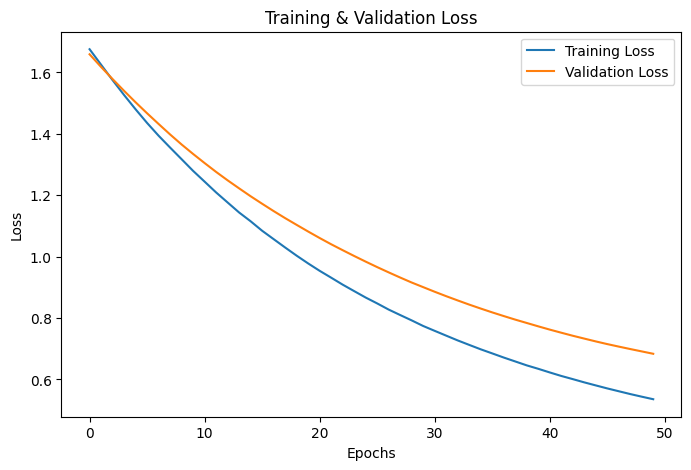

In [19]:
model=Sequential([Dense(16,activation="relu",input_shape=(4,)),Dense(3,activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model_history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f"The test accuracy is {test_accuracy:.4f}" )

array_training_losses=np.array(model_history.history['loss'])
array_validation_losses=np.array(model_history.history['val_loss'])

print("Training Losses:\n", array_training_losses)
print("Validation Losses:\n", array_validation_losses)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(array_training_losses, label='Training Loss')
plt.plot(array_validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()